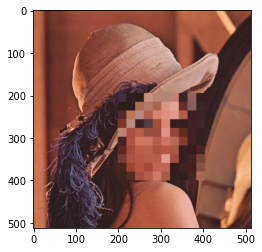

In [1]:
import matplotlib.pyplot as plt
import cv2

def mosaic(img,rect,size):
    #モザイクをかける領域を取得
    (x1,y1,x2,y2)=rect
    w=x2-x1
    h=y2-y1
    i_rect=img[y1:y2,x1:x2]
    #モザイク処理のため、一度縮小して拡大
    i_small=cv2.resize(i_rect,(size,size))
    i_mos=cv2.resize(i_small,(w,h),interpolation=cv2.INTER_AREA)
    #画像にモザイク画像を重ねる
    img2=img.copy()
    img2[y1:y2,x1:x2]=i_mos
    return img2

#カスケードファイルを指定して分類機を作成
cascade_file="haarcascade_frontalface_alt.xml"
cascade=cv2.CascadeClassifier(cascade_file)

#画像を読み込んでグレースケールに変換
img=cv2.imread("girl.png")
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#顔認識を実行　顔と認識する領域の最小サイズを引数にとる
face_list=cascade.detectMultiScale(img_gray,minSize=(150,150))
#結果の確認
if len(face_list)==0:
    print("失敗")
    quit()
#認識した部分の画像にモザイクをかける
for(x,y,w,h) in face_list:
    img=mosaic(img,(x,y,x+w,y+h),10)
#画像を出力
cv2.imwrite("face-mosaic.png",img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

---0---
顔の座標= 199 195 205 205
---10---
顔の座標= 248 228 203 203
---20---
顔の座標= 283 250 217 217
---30---
---40---
---50---
---60---
---70---
---80---


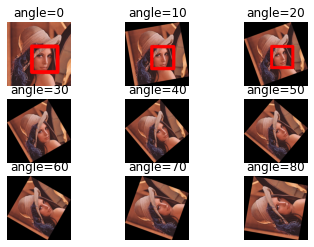

In [3]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

#カスケードファイルを指定して分類機を作成
cascade_file="haarcascade_frontalface_alt.xml"
cascade=cv2.CascadeClassifier(cascade_file)
img=cv2.imread("girl.png")

#顔検出を実行し、印をつける
def face_detect(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_list=cascade.detectMultiScale(img_gray,minSize=(150,150))
    #認識した部分に印をつける
    for(x,y,w,h) in face_list:
        print("顔の座標=",x,y,w,h)
        red=(0,0,255)
        cv2.rectangle(img,(x,y),(x+w,y+h),red,thickness=30)
#角度ごとに検証する
for i in range(0,9):
    ang=i*10
    print("---"+str(ang)+"---")
    img_r=ndimage.rotate(img,ang)#回転させる関数
    face_detect(img_r)
    plt.subplot(3,3,i+1)#subplot(行数、列数、何番目を描画するか)で複数のグラフを描画できる
    plt.axis("off")
    plt.title("angle="+str(ang))
    plt.imshow(cv2.cvtColor(img_r,cv2.COLOR_BGR2RGB))

plt.show()